# Analyse du fichier Train Ancestors

train_ancestors

- id - unique ID of the notebook (same as for train_orders.csv)

On Kaggle, a user may "fork" (that is, copy) the notebook of another user to create their own version. This file contains the forking history of notebooks in the training set. 
Note: There is no corresponding file for the test set.
- ancestor_id - Identifies sets of notebooks that have a common origin or "ancestor". As no notebook in the test set has an ancestor in the training set, you may find this field to be of use as a grouping factor when constructing validation splits.

- parent_id - Indicates that some version of the notebook id was forked from some version of the notebook parent_id. The notebook parent_id may or may not be present in the training data. (The parent may be missing because someone had forked a private notebook of their own, for instance.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importer fichier ancestors

In [3]:
df = pd.read_csv('../raw_data/train_ancestors.csv')
df.head()

,id,ancestor_id,parent_id
0,00001756c60be8,945aea18,NaN
1,00015c83e2717b,aa2da37e,317b65d12af9df
2,0001bdd4021779,a7711fde,NaN
3,0001daf4c2c76d,090152ca,NaN
4,0002115f48f982,272b483a,NaN


In [4]:
df.describe()

,id,ancestor_id,parent_id
count,139256,139256,19542
unique,139256,125372,13630
top,00001756c60be8,4569bfc1,9d45e544c18f00
freq,1,65,58


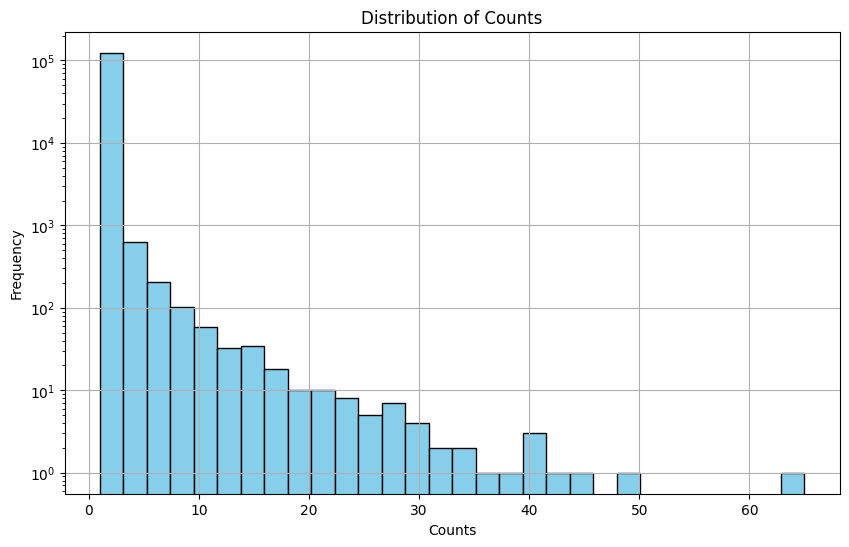

In [20]:
grouped_df = df.groupby('ancestor_id')['id'].count()
sorted_df = grouped_df.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.hist(sorted_df, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True)
plt.show()

In [19]:
sorted_df

ancestor_id
4569bfc1    65
51dd4f97    49
021526f8    44
09489e94    43
612efa48    41
            ..
57aaa017     1
57aa437b     1
57aa0621     1
57a9b26d     1
ffff7eb0     1
Name: id, Length: 125372, dtype: int64